## Main notebook

### Import libraries

In [1]:
import sys
sys.path.append('/work/users/malbanese/radspesoft/ClimTools/climtools') 

import numpy as np 
import os 
import re
import glob 
import xarray as xr
import time 
import matplotlib.cbook as cbook 
import pickle 
import dask.array as da

from climtools import climtools_lib as ctl
from matplotlib import pyplot as plt
from scipy import stats 
from cftime import DatetimeGregorian

No DISPLAY variable set. Switching to agg backend


In [2]:
%matplotlib inline

### Import Functions

In [3]:
from utils import load_kernel, regrid_files, climatology, mask_atm, mask_pres, pliq, pice, dlnws, fb_planck_surf, fb_plank_atm_lr, fb_albedo, fb_wv, calc_fb, fb_cloud
from plot import plot_dRt

### Regridding simulations from EC-Earth4

In [ ]:
input_pattern = "/work/users/malbanese/radspesoft/t_sim/s003/oifs/s003_atm_cmip6_pl_1m_*.nc"  # Use glob pattern to match all .nc files in the folder
target_grid = "r180x90"
method = "ycon"
output_dir = "/work/users/malbanese/radspesoft/t_sim/s003/oifs"

regrid_files(input_pattern, target_grid, method, output_dir)

## Import kernels

### Huang radiative kernels

In [12]:
config_file = "/work/users/malbanese/radspesoft/config.yaml"
broadband_kernels = load_kernel(config_file)

## Feedbacks calculation

In [5]:
# Set up logging for detailed outputs
import logging
from importlib import reload

# Initialize the logging module
reload(logging)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Surface Planck feedback

In [5]:

config_file = "/work/users/malbanese/radspesoft/config.yaml"
sf_feedback = fb_planck_surf(config_file)

2025-02-03 16:14:51,526 - INFO - Starting fb_planck_surf function.
2025-02-03 16:14:51,532 - INFO - Loading kernel data from file.
2025-02-03 16:14:51,623 - INFO - Loading input files.
2025-02-03 16:14:54,972 - INFO - Computing climatology.


Regridding completed in 0:00:02.734191
Regridding completed in 0:00:00.489754


2025-02-03 16:14:57,921 - INFO - Computing anomalies.
2025-02-03 16:14:58,760 - INFO - Computing global temperature anomalies.
2025-02-03 16:14:59,837 - INFO - Processing feedbacks for clr.
2025-02-03 16:15:00,042 - INFO - Saved clr feedback to file.
2025-02-03 16:15:00,043 - INFO - Processing feedbacks for cld.
2025-02-03 16:15:00,262 - INFO - Saved cld feedback to file.
2025-02-03 16:15:00,263 - INFO - Function completed in 8.73 seconds.


### Atmospheric Planck and lapse-rate feedbacks

In [5]:

config_file = "/work/users/malbanese/radspesoft/config.yaml"
palp_feedbacks = fb_plank_atm_lr(config_file)

2025-02-03 17:11:17,010 - INFO - Starting fb_plank_atm_lr function.
2025-02-03 17:11:17,017 - INFO - Loading kernel data from file.
2025-02-03 17:11:17,106 - INFO - Loading input files.
2025-02-03 17:11:20,712 - INFO - Computing climatology.


Regridding completed in 0:00:03.173742
Regridding completed in 0:00:00.329995


2025-02-03 17:11:29,907 - INFO - Computing anomalies.


Regridding completed in 0:00:00.298055
Regridding completed in 0:00:00.283479


2025-02-03 17:12:02,844 - INFO - Function completed in 17.02 seconds.
2025-02-03 17:12:04,172 - INFO - Processing feedbacks for clr.
2025-02-03 17:14:05,268 - INFO - Saved clr feedback to file.
2025-02-03 17:14:05,278 - INFO - Processing feedbacks for cld.
2025-02-03 17:14:14,672 - INFO - Saved cld feedback to file.
2025-02-03 17:14:14,674 - INFO - fb_plank_atm_lr function completed in 177.66 seconds.


### Albedo feedback

### Codice per controllo variabili

In [6]:
import xarray as xr

# Carica il file
ds = xr.open_dataset("/work/users/malbanese/radspesoft/std_sim/oifs/s000_atm_cmip6_1m_1990-1990_regridded.nc")

# Controlla la variabile albsn
print(ds["rsut"])
print(ds["rsut"].min().values, ds["rsut"].max().values, ds["rsut"].mean().values)

<xarray.DataArray 'rsut' (time_counter: 12, lat: 90, lon: 180)> Size: 2MB
[194400 values with dtype=float64]
Coordinates:
    time_centered  (time_counter) datetime64[ns] 96B ...
  * time_counter   (time_counter) datetime64[ns] 96B 1990-01-16T12:00:00 ... ...
  * lat            (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon            (lon) float64 1kB 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
Attributes:
    standard_name:       toa_outgoing_shortwave_flux
    long_name:           TOA Outgoing Shortwave Radiation
    units:               W m-2
    online_operation:    average
    interval_operation:  2700 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2700 s)
0.0 400.0897334693457 104.18397340164633


In [4]:

config_file = "/work/users/malbanese/radspesoft/config.yaml"
alb_feedback = fb_albedo(config_file)

2025-01-23 17:35:10,039 - INFO - Starting fb_planck_surf function.
2025-01-23 17:35:10,041 - INFO - Loading kernel data from file.
2025-01-23 17:35:10,135 - INFO - Loading input files.
2025-01-23 17:35:10,715 - INFO - Dataset size: (144, 90, 180)
2025-01-23 17:35:13,417 - INFO - Computing climatology.


Regridding completed in 0:00:02.698074
Regridding completed in 0:00:00.499942


2025-01-23 17:35:16,602 - INFO - Var (albsn) min: 0.0, max: 9.924177056653568e+18, mean: 2.278909029579529e+16
2025-01-23 17:35:16,606 - INFO - Piok (climatology) min: 0.0, max: 9.924177056653566e+18, mean: 3.4625538266262844e+16
2025-01-23 17:35:17,330 - INFO - Anomalies min: -8.642549170752053e+18, max: 3.420931806838033e+18, mean: -1.183644797046756e+16
2025-01-23 17:35:17,777 - INFO - Anomalies min: -8.642549170752053e+18, max: 3.420931806838033e+18, mean: -1.183644797046756e+16
2025-01-23 17:35:17,778 - INFO - Processing feedbacks for clr.
2025-01-23 17:35:17,977 - INFO - Saved clr feedback to file.
2025-01-23 17:35:17,978 - INFO - Processing feedbacks for cld.
2025-01-23 17:35:18,190 - INFO - Saved cld feedback to file.
2025-01-23 17:35:18,193 - INFO - Function completed in 8.15 seconds.


### Water Vapour Feedback

In [6]:

config_file = "/work/users/malbanese/radspesoft/config.yaml"
wv_feedback = fb_wv(config_file)

2025-02-03 17:29:53,943 - INFO - Starting fb_planck_surf function.
2025-02-03 17:29:53,954 - INFO - Loading kernel data from file.


Regridding completed in 0:00:02.777141
Regridding completed in 0:00:00.295325


2025-02-03 17:30:13,949 - INFO - Function completed in 16.17 seconds.
2025-02-03 17:30:14,036 - INFO - Loading input files.
2025-02-03 17:30:14,494 - INFO - Computing climatology.


Regridding completed in 0:00:00.281152
Regridding completed in 0:00:00.306323


2025-02-03 17:30:16,796 - INFO - Computing anomalies.
2025-02-03 17:30:19,355 - INFO - Processing feedbacks for clr.
2025-02-03 17:30:21,747 - INFO - Saved clr feedback to file.
2025-02-03 17:30:21,749 - INFO - Processing feedbacks for cld.
2025-02-03 17:30:23,308 - INFO - Saved cld feedback to file.
2025-02-03 17:30:23,309 - INFO - Function completed in 29.36 seconds.


### All feedbacks

In [8]:
# Change the path of t_sim and t_sim1

t_sim = "/work/users/malbanese/radspesoft/t_sim/s003/oifs/s003_atm_cmip6_1m_*_regridded.nc"
t_sim1 = "/work/users/malbanese/radspesoft/t_sim/s003/oifs/s003_atm_cmip6_pl_1m_*_regridded.nc"
std_sim = "/work/users/malbanese/radspesoft/std_sim/oifs/s000_atm_cmip6_1m_*_regridded.nc"
std_sim1 = "/work/users/malbanese/radspesoft/std_sim/oifs/s000_atm_cmip6_pl_1m_*_regridded.nc"
cart_k = "/work/users/malbanese/radspesoft/kernels/Huang/toa/RRTMG_{}_toa_{}_highR.nc"
cart_ck = "/work/users/malbanese/radspesoft/output/rad_Huang/"
cart_out = "/work/users/malbanese/radspesoft/output/rad_Huang/s003_feedbacks/"
pressure_directory="/work/users/malbanese/radspesoft/std_sim/oifs"

all_feedback = calc_fb(t_sim, t_sim1, std_sim, std_sim1, cart_out, cart_ck, cart_k, pressure_directory, use_climatology = True, time_chunk=12)

2025-01-28 12:02:41,478 - INFO - Starting fb_planck_surf function.
2025-01-28 12:02:41,480 - INFO - planck surf
2025-01-28 12:02:41,482 - INFO - planck atm
2025-01-28 12:02:41,483 - INFO - albedo
2025-01-28 12:02:41,484 - INFO - w-v
2025-01-28 12:02:41,499 - INFO - calcolo feedback


AttributeError: 'DataArray' object has no attribute 'year'

### Clouds feedback

In [9]:
# Change the path of t_sim and t_sim1

t_sim = "/work/users/malbanese/radspesoft/t_sim/s003/oifs/s003_atm_cmip6_1m_*_regridded.nc"
t_sim1 = "/work/users/malbanese/radspesoft/t_sim/s003/oifs/s003_atm_cmip6_pl_1m_*_regridded.nc"
std_sim = "/work/users/malbanese/radspesoft/std_sim/oifs/s000_atm_cmip6_1m_*_regridded.nc"
std_sim1 = "/work/users/malbanese/radspesoft/std_sim/oifs/s000_atm_cmip6_pl_1m_*_regridded.nc"
cart_k = "/work/users/malbanese/radspesoft/kernels/Huang/toa/RRTMG_{}_toa_{}_highR.nc"
cart_ck = "/work/users/malbanese/radspesoft/output/rad_Huang/"
cart_out = "/work/users/malbanese/radspesoft/output/rad_Huang/s003_feedbacks/"
pressure_directory="/work/users/malbanese/radspesoft/std_sim/oifs"

cloud_feedback = fb_cloud(t_sim, t_sim1, std_sim, std_sim1, cart_out, cart_ck, cart_k, pressure_directory, use_climatology=True, time_chunk=12)

print(cloud_feedback)

2025-01-28 12:02:48,150 - INFO - Starting fb_cloud function.
2025-01-28 12:02:48,189 - INFO - Starting fb_planck_surf function.
2025-01-28 12:02:48,190 - INFO - planck surf
2025-01-28 12:02:48,191 - INFO - planck atm
2025-01-28 12:02:48,192 - INFO - albedo
2025-01-28 12:02:48,193 - INFO - w-v
2025-01-28 12:02:48,217 - INFO - calcolo feedback


AttributeError: 'DataArray' object has no attribute 'year'

### Plot Spectra

Processed: dRt_lapse-rate_global_clr_climatology.nc, dRt = -0.061150
Processed: dRt_planck-atmo_global_clr_climatology.nc, dRt = 0.005385
Processed: dRt_planck-surf_global_clr_climatology.nc, dRt = 0.004802
Processed: dRt_water-vapor_global_clr_climatology.nc, dRt = 0.265039


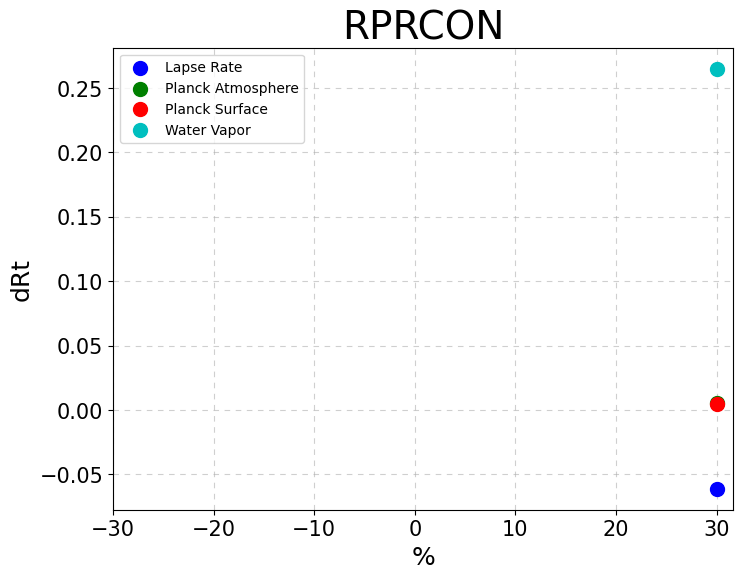

In [7]:
folder_path = "/work/users/malbanese/radspesoft/output/rad_Huang/s003_feedbacks"
files = [
    "dRt_lapse-rate_global_clr_climatology.nc",
    "dRt_planck-atmo_global_clr_climatology.nc",
    "dRt_planck-surf_global_clr_climatology.nc",
    "dRt_water-vapor_global_clr_climatology.nc"
]
variations = [30, 30, 30, 30]  # Stessa variazione per tutti i feedback
labels = ["Lapse Rate", "Planck Atmosphere", "Planck Surface", "Water Vapor"]  # Nomi dei feedback
xlabel = "%"
ylabel = "dRt"
title = "RPRCON"

plot_dRt(folder_path, files, variations, xlabel, ylabel, title, labels)